<a href="https://colab.research.google.com/github/AjeetSingh02/Notebooks/blob/master/Vaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
! pip install --upgrade vaex

In [0]:
import vaex
import pandas as pd

import numpy as np

In [0]:
path = "/content/sample_data/california_housing_train.csv"
pandas_df = pd.read_csv(path) 
vaex_df = vaex.from_csv(path, copy_index=True)

In [0]:
!wget http://vaex.astro.rug.nl/data/helmi-dezeeuw-2000-10p.hdf5

--2020-03-09 07:53:20--  http://vaex.astro.rug.nl/data/helmi-dezeeuw-2000-10p.hdf5
Resolving vaex.astro.rug.nl (vaex.astro.rug.nl)... 129.125.6.3
Connecting to vaex.astro.rug.nl (vaex.astro.rug.nl)|129.125.6.3|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://vaex.io/data/helmi-dezeeuw-2000-10p.hdf5 [following]
--2020-03-09 07:53:21--  https://vaex.io/data/helmi-dezeeuw-2000-10p.hdf5
Resolving vaex.io (vaex.io)... 104.27.177.135, 104.27.176.135, 2606:4700:3035::681b:b187, ...
Connecting to vaex.io (vaex.io)|104.27.177.135|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-03-09 07:53:21 ERROR 404: Not Found.



In [0]:
vaex_df

#,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,index
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0,1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0,4
...,...,...,...,...,...,...,...,...,...,...
"16,995",-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,16995
"16,996",-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,16996
"16,997",-124.3,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,16997
"16,998",-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,16998


In [0]:
pandas_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [0]:
vaex_df[vaex_df.housing_median_age < 30]  # easily filter your DataFrame, without making a copy

#,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,index
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0,1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0,4
...,...,...,...,...,...,...,...,...,...,...
"8,806",-124.21,41.75,20.0,3810.0,787.0,1993.0,721.0,2.0074,66900.0,16988
"8,807",-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0,16990
"8,808",-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,16991
"8,809",-124.3,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,16997


In [0]:
pandas_df[pandas_df.housing_median_age < 30]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16988,-124.21,41.75,20.0,3810.0,787.0,1993.0,721.0,2.0074,66900.0
16990,-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0
16991,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


Filtering of a DataFrame, such as ds_filtered = ds[ds.x >0] merely results in a reference to the existing data plus a boolean mask keeping track which rows are selected and which are not. Almost no memory usage, and no memory copying going on.


In [0]:
temp1 = vaex_df[vaex_df.housing_median_age < 30]  # easily filter your DataFrame, without making a copy
temp1[:5][['housing_median_age', 'total_rooms']]  # take the first five rows, and only the 'x' and 'y' column (no memory copy!)

#,housing_median_age,total_rooms
0,15,5612
1,19,7650
2,17,720
3,14,1501
4,20,1454


In [0]:
#PANDAS
temp2 = pandas_df[pandas_df.housing_median_age < 30]
temp2[:5][['housing_median_age', 'total_rooms']] 

,housing_median_age,total_rooms
0,15.0,5612.0
1,19.0,7650.0
2,17.0,720.0
3,14.0,1501.0
4,20.0,1454.0


When dealing with huge datasets, say a billion rows (10^9), computations with the data can waste memory, up to 8 GB for a new column. Instead, vaex uses **lazy computation**, storing only a representation of the computation, and computations are done on the fly when needed. You can just use many of the numpy functions, as if it was a normal array.

This is similar to how TensorFlow works. Like TensorFlow which creates DAG (Directed Ascyclic Graph), Vaex creates representation of the computation. The benifit of this method is that only when there is requirement of the output, the calulations will be done. Till then there will be no calculation and thus the RAM which is utilized in storing data will be free.

When you apply your operations, you can print out the dataframe, and directly see a preview (head and tail), without any delay. **Only the values you see are evaluated.**

In [0]:
# creates an expression (nothing is computed)
some_expression = vaex_df.housing_median_age + vaex_df.total_rooms
some_expression  # for convenience, we print out some values

Expression = (housing_median_age + total_rooms)
Length: 17,000 dtype: float64 (expression)
------------------------------------------
    0  5627
    1  7669
    2   737
    3  1515
    4  1474
    ...    
16995  2269
16996  2385
16997  2694
16998  2691
16999  1872

In [0]:
# PANDAS
pandas_df.housing_median_age + pandas_df.total_rooms

INFO:MainThread:numexpr.utils:NumExpr defaulting to 2 threads.


0        5627.0
1        7669.0
2         737.0
3        1515.0
4        1474.0
          ...  
16995    2269.0
16996    2385.0
16997    2694.0
16998    2691.0
16999    1872.0
Length: 17000, dtype: float64

These expressions can be added to a DataFrame, creating what we call a **virtual column**. These virtual columns are similar to normal columns, except they do not waste memory.

In [0]:
vaex_df['r'] = some_expression  # add a (virtual) column that will be computed on the fly
vaex_df.mean(vaex_df.housing_median_age), vaex_df.mean(vaex_df.r)  # calculate statistics on normal and virtual columns

(array(28.58935294), array(2672.25376471))

In [0]:
vaex_df.r

Expression = r
Length: 17,000 dtype: float64 (column)
--------------------------------------
    0  5627
    1  7669
    2   737
    3  1515
    4  1474
    ...    
16995  2269
16996  2385
16997  2694
16998  2691
16999  1872

One of the core features of vaex is its ability to calculate statistics on a regular (N-dimensional) grid. The dimensions of the grid are specified by the binby argument (analogous to SQL’s grouby), and the shape and limits.

In [0]:
vaex_df.mean(vaex_df.r, binby=vaex_df.housing_median_age) # create statistics on a regular grid (1d)

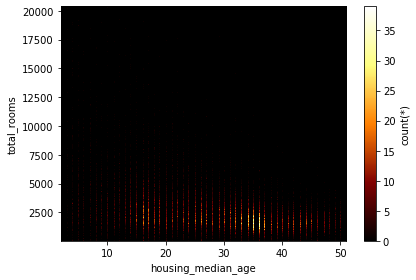

In [0]:
vaex_df.plot(vaex_df.housing_median_age, vaex_df.total_rooms, show=True);  # make a plot quickly

Vaex uses ApacheArrow data structures and C++ to speed up string operations by a factor of about ~30–100x on a quadcore laptop, and up to 1000x on a 32 core machine. Nearly all of Pandas’ string operations are supported, and memory usage is practically zero because the lazy computations are done in chunks.

In [0]:
nyctaxi = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')

In [0]:
nyctaxi.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7
